# Image Interpretation – Assignment 5

This assignment on __Deep Convolutional Neural Networks__ covers the deep networks labs from 7th and 14th of November, and is graded by a maximum of 9 points.

In order to submit the results, send a ZIP file with your implemented code (functions prefixed with ii and any “helper” functions you wrote) to <riccardo.delutio@geod.baug.ethz.ch> with subject [Image Interpretation 2019 Assignment 5] no later than on the 20st of November, 2019.

In addition to the code, include a report explaining the structure of the code and the python functions used and all technical decisions as well. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying
data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The report should not contain any code snippets (but the code should contain comments if appropriate). 

__Team work is not allowed__. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is __not__. If you use any code fragments found on the Internet, make sure you reference them properly.

# Exercise 1, 2pts

In this first exercise we are going to get an idea on how simple neural networks
behave for simple classification tasks. We’ll make use of two different javascript
based neural network to train and modify an existing model. Let’s start with a very
simple one, a simple neural network with only fully connected layers and without
convolutions. Open a web browser on the page http://playground.tensorflow.org/ and start playing with the interface. For each dataset set the noise level to 30. Click play on the top-left to start training. To assess the quality of the network look at the values train and test loss at the top right. Tip: Sometimes it’s easier
to see the result if you discretise the graph.

1. For each dataset (the four boxes under DATA) explore the best features that
make the network converge faster.
2. For the spiral dataset and default network how does the batch size (bottom
left slider) influence the results? How does it relate with the learning rate
(central top)?
3. Try all the different activation layers (top slider), what are their differences?
Why?
4. How does the number of hidden layers and the number of neuron per
	layer affect the results in terms of quality (test loss) and convergence
	speed?
5. Compare the performance (convergence rate and accuracy) of a network for regression and classification? Explain the differences.
6. Play with different types and rates of regularization (top slider) and explain the changes you observe and the influence on the results.

Explain each question and motivate it with a screenshot of the experiment.

__The following part is optional, but fun!__ Open this page https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html and try to tweak all the pa-
rameters you can to obtain the best network (the highest validation accuracy).
Scroll down the page and peek inside the network and have a look at different
activation and weight as the network gets trained (click pause to make it freeze).
Check how the prediction works on the test set in the last part of the page.

# Exercise 2, 3pts

In this exercise you have to train a new Convolutional Neural Network from scratch for the classification of images.
1. For this we will use the [Keras](https://keras.io/) library. You can download it on your `conda` environment with `conda install keras-gpu`.
2. The aim is to achieve 99% accuracy (on validation/test set) the MNIST dataset http://yann.lecun.com/exdb/mnist/. We have provided a basic Keras implementation of a CNN.
3. You are allowed to do whatever you want (except copy pasting) with the
network as long as it is explained in your report. Feel free to change the architecture
of the network as well as parameters (e.g. learning rate, kernel sizes, ...). You
can try to guess parameters manually of you want, just make sure that it
performs better than 99% on the validation set.
4. Sketch the final network architecture in your report.
5. Make sure you train the network on the GPU, otherwise it will be too slow.
6. Explain the plots that appear.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


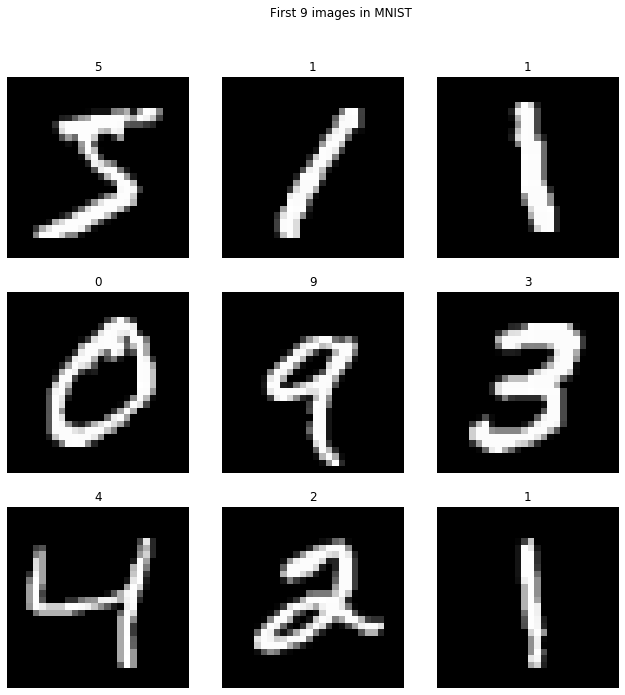

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 100
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# plot the first 9 training images in MNIST
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
fig.suptitle('First 9 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(3) for j in range(3)]:
    ax[x, y].axis('off')
    ax[x, y].imshow(x_train[x + y * 3,:,:,:].reshape((28,28)), cmap = 'gray')
    ax[x, y].set_title(np.where(y_train[x + y * 3])[0][0])
plt.show()

In [8]:
# The model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(1-0.8))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(1-0.8))

model.add(Conv2D(256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(1-0.8))

model.add(Flatten())
model.add(Dropout(1-0.75))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(lr=0.001, momentum=0.9, decay=0.0),metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 512us/step - loss: 0.2081 - acc: 0.9361 - val_loss: 0.0870 - val_acc: 0.9724
Epoch 2/20
60000/60000 [==============================] - 30s 494us/step - loss: 0.0769 - acc: 0.9765 - val_loss: 0.0544 - val_acc: 0.9824
Epoch 3/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.0598 - acc: 0.9815 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 4/20
60000/60000 [==============================] - 29s 489us/step - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0398 - val_acc: 0.9857
Epoch 5/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0430 - acc: 0.9867 - val_loss: 0.0431 - val_acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0376 - acc: 0.9887 - val_loss: 0.0337 - val_acc: 0.9880
Epoch 7/20
60000/60000 [==============================] - 30s 493us/step - loss: 0.0334 - acc: 0.9898 - val_loss: 0.

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 11, 11, 128)       512       
__________

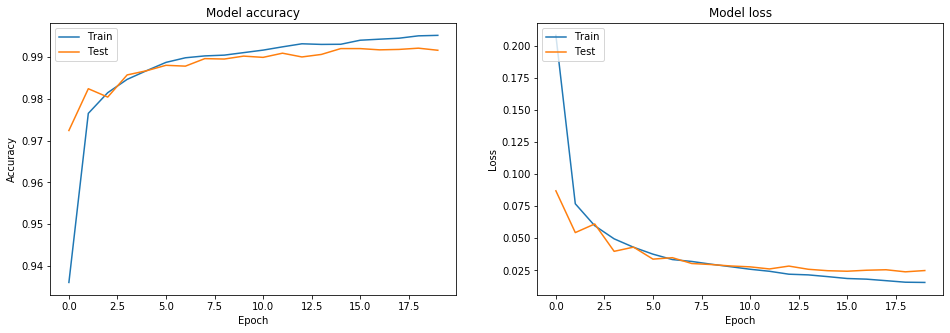

In [10]:
# Plot training & validation accuracy
figsize = (16,5)
plt.figure(figsize=figsize)
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Exercise 3, 4pts

There is a competition [https://www.kaggle.com/c/dogs-vs-cats-imint-2019](https://www.kaggle.com/t/7ce01cf04f01448186f23a95768fc596). You should
have at least 75% accuracy on the public leaderboard to get basic points on this
exercise. The first 3 places will have extra points (5 for the first place, and 4 for
the second and the third place). Use all your knowledge and experience to attack
the problem.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import shutil
import tensorflow
from tensorflow import keras
from keras import regularizers
from keras.optimizers import RMSprop, SGD, Adadelta, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
from sklearn.model_selection import train_test_split

In [4]:
# Run on GPU
config = tensorflow.ConfigProto(device_count = {'GPU': 1 , 'CPU': 4}) 
sess = tensorflow.Session(config=config) 
keras.backend.set_session(sess)

## Load data
Sort datafile in a way to feed the image generator later.

In [5]:
train_dir = './cats_vs_dogs'

# Create new files
# os.makedirs(train_dir+'dogs')
# os.makedirs(train_dir+'cats')

In [6]:
# train_dog_dir = glob.glob(train_dir+'/dog.*.jpg')
# train_cat_dir = glob.glob(train_dir+'/cat.*.jpg')

# # Move into two files
# for img in train_dog_dir:
#     shutil.move(img, train_dir+'/dogs')
# for img in train_cat_dir:
#     shutil.move(img, train_dir+'/cats')

In [7]:
# Output data size
TRAIN_CAT_SIZE = len(os.listdir(train_dir+'/cats'))
TRAIN_DOG_SIZE = len(os.listdir(train_dir+'/dogs'))
TRAIN_ALL_SIZE = TRAIN_CAT_SIZE + TRAIN_DOG_SIZE

print('Total training images:', TRAIN_ALL_SIZE)
print('Total training dog images', TRAIN_DOG_SIZE)
print('Total training cat images', TRAIN_CAT_SIZE )

Total training images: 18752
Total training dog images 9376
Total training cat images 9376


## Process data
- Resize all images to have the same input size for the training network.
- Normalize the pixel value to get the range `[0,1]`.
- Split all training data again into training and validation data to tune the network and hyperparameters. Here, 30% is chosen as validation.

In [8]:
NUM_CLASS = 1 # set as 1 and use sigmiod for final output layer
TRAIN_FRACTION = 0.7
BATCH_SIZE = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_CHANNELS = 3

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=1-TRAIN_FRACTION)
# train_image_generator = ImageDataGenerator(rescale=1./255, 
#                                              validation_split=1-TRAIN_FRACTION, 
#                                              horizontal_flip=True, 
#                                              width_shift_range=0.15,
#                                              height_shift_range=0.15,
#                                              rotation_range=15,
#                                              zoom_range=0.3)

In [10]:
train_data_generator = train_image_generator.flow_from_directory(directory=train_dir,
                                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 class_mode='binary',
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=True,
                                                                 subset='training')

Found 13128 images belonging to 2 classes.


In [11]:
val_data_generator = train_image_generator.flow_from_directory(directory=train_dir,
                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               class_mode='binary',
                                                               batch_size=BATCH_SIZE,
                                                               shuffle=True,
                                                               subset='validation')

Found 5624 images belonging to 2 classes.


## Construct the model
Pre-constructed model is used here to increase the performance.

In [12]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

for layer in base_model.layers:
    layer.trainable = False

In [13]:
model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(1-0.75))

model.add(Dense(256, activation='relu'))
model.add(Dropout(1-0.75))

model.add(Dense(NUM_CLASS))
model.add(Activation("sigmoid"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary() # scratch the network table


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
activation_95 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_______________________________________________

## Train the model

In [15]:
EPOCHS = 8

In [16]:
history = model.fit_generator(train_data_generator,
                              steps_per_epoch=train_data_generator.n//train_data_generator.batch_size,
                              epochs=EPOCHS,
                              validation_data=val_data_generator,
                              validation_steps=val_data_generator.n//val_data_generator.batch_size)

Epoch 1/8
205/205 [==============================] - 164s 802ms/step - loss: 0.4624 - acc: 0.7645 - val_loss: 0.2100 - val_acc: 0.9538
Epoch 2/8
205/205 [==============================] - 54s 262ms/step - loss: 0.3445 - acc: 0.8435 - val_loss: 0.2465 - val_acc: 0.9516
Epoch 3/8
205/205 [==============================] - 52s 255ms/step - loss: 0.3042 - acc: 0.8644 - val_loss: 0.2308 - val_acc: 0.9541
Epoch 4/8
205/205 [==============================] - 52s 254ms/step - loss: 0.2782 - acc: 0.8800 - val_loss: 0.2254 - val_acc: 0.9574
Epoch 5/8
205/205 [==============================] - 52s 254ms/step - loss: 0.2637 - acc: 0.8880 - val_loss: 0.2762 - val_acc: 0.9516
Epoch 6/8
205/205 [==============================] - 52s 256ms/step - loss: 0.2576 - acc: 0.8885 - val_loss: 0.2944 - val_acc: 0.9514
Epoch 7/8
205/205 [==============================] - 52s 253ms/step - loss: 0.2360 - acc: 0.8988 - val_loss: 0.2849 - val_acc: 0.9529
Epoch 8/8
205/205 [==============================] - 53s 257m

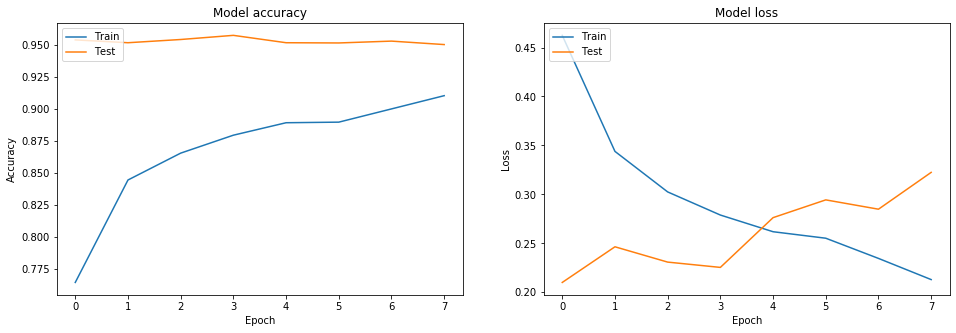

In [27]:
# Plot training & validation accuracy
figsize = (16,5)
plt.figure(figsize=figsize)
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Predict results and create submission

In [41]:
test_dir = './test'
test_filenames = os.listdir(test_dir+'/test')
TEST_SIZE = len(test_filenames)
print('Total test images:', TEST_SIZE)

Total test images: 6248


In [42]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_image_generator.flow_from_directory(directory=test_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode=None,
                                                          batch_size=1,
                                                          shuffle=False,    
                                                          seed=42)

test_generator.reset()

Found 6248 images belonging to 1 classes.


In [ ]:
# Predict unlabeled test data
y_pred = model.predict_generator(test_generator, verbose=1, steps=test_generator.n//test_generator.batch_size)
y_pred = [1 if y>0.5 else 0 for y in y_pred]

In [ ]:
test_df = pd.DataFrame({'filename': test_filenames})

# Extract id
test = []
for i in range(len(test_filenames)):
    test.append(test_filenames[i].split('.')[0])
test_df = pd.DataFrame({'id': test})

test_df['label'] = y_pred

test_df.to_csv('./submission3_incep_batch64_epoch8.csv', index=False, sep=',')